<a href="https://colab.research.google.com/github/amoheric/Data-Science-Projects/blob/main/Final_Project_Breast_Cancer_Diagnosis_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Breast Cancer Diagnosis Prediction

**Dataset:** Breast Cancer Wisconsin (Diagnostic)  
**Student:** Eric Amoh Adjei  
**Objective:** Predict whether a tumor is benign or malignant based on medical features.

---

## Dataset Introduction

This dataset originates from the UCI Machine Learning Repository. It contains features computed from digitized images of fine needle aspirate (FNA) of breast masses. These features describe the characteristics of the cell nuclei present in the image.

- **Rows:** Each represents a patient
- **Target:** Class (2 = benign, 4 = malignant)
- **Features:** Cell shape, size, uniformity, etc.

---



## 2. Loading Libraries and Exploring the Dataset

In [10]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
from sklearn.svm import SVC
import colab_kernel_launcher

##### --OR--

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/improve-breast-cancer-prognostics-using-machine")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/improve-breast-cancer-prognostics-using-machine


---

##### Loading & Preview of 🚵 the Dataset

In [12]:

# Set plot style
sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv("/content/breast-cancer-wisconsin.data.csv", header=None)

# Show number of columns and preview
print("Number of columns:", df.shape[1])
df.head()




Number of columns: 12


,0,1,2,3,4,5,6,7,8,9,10,11
0,index,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
1,0,1002945,5,4,4.0,5.0,7,10,3,2.0,1.0,2.0
2,1,1015425,3,1,1.0,1.0,2,2,3,1.0,1.0,2.0
3,2,1016277,6,8,8.0,1.0,3,4,3,7.0,1.0,2.0
4,3,1017023,4,1,1.0,3.0,2,1,3,1.0,1.0,2.0


##### Assigning column names (from dataset documentation)

In [13]:
# Assign column names based on the dataset documentation and the actual number of columns
# The dataset has an extra unnamed index column at the beginning.
df.columns = ['Unnamed_Index','ID', 'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
              'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
              'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

# Display the first few rows with the new column names
df.head()

,Unnamed_Index,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,index,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
1,0,1002945,5,4,4.0,5.0,7,10,3,2.0,1.0,2.0
2,1,1015425,3,1,1.0,1.0,2,2,3,1.0,1.0,2.0
3,2,1016277,6,8,8.0,1.0,3,4,3,7.0,1.0,2.0
4,3,1017023,4,1,1.0,3.0,2,1,3,1.0,1.0,2.0


---

## 2. Data Cleaning and Exploratory Data Analysis



Missing values per column:
Unnamed_Index                  0
ID                             0
Clump_Thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Summary statistics:
                 ID  Clump_Thickness  Uniformity_Cell_Size  \
count  6.990000e+02       699.000000            699.000000   
mean   1.071704e+06         4.417740              3.134478   
std    6.170957e+05         2.815741              3.051459   
min    6.163400e+04         1.000000              1.000000   
25%    8.706885e+05         2.000000              1.000000   
50%    1.171710e+06         4.000000              1.000000   
75%    1.238298e+06         6.000000              5.000000   
max    1.345435e+07        10.000000          

/tmp/ipython-input-14-3678333155.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Class'] = df_cleaned['Class'].map({2: 0, 4: 1})


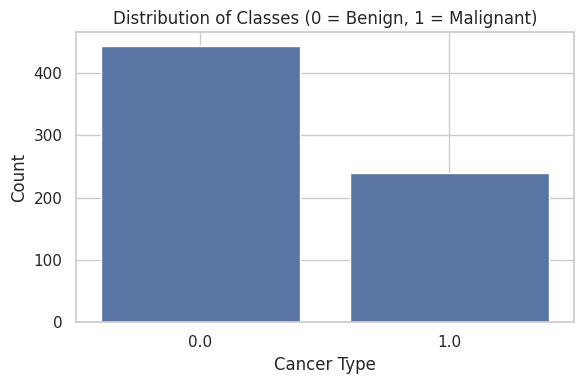

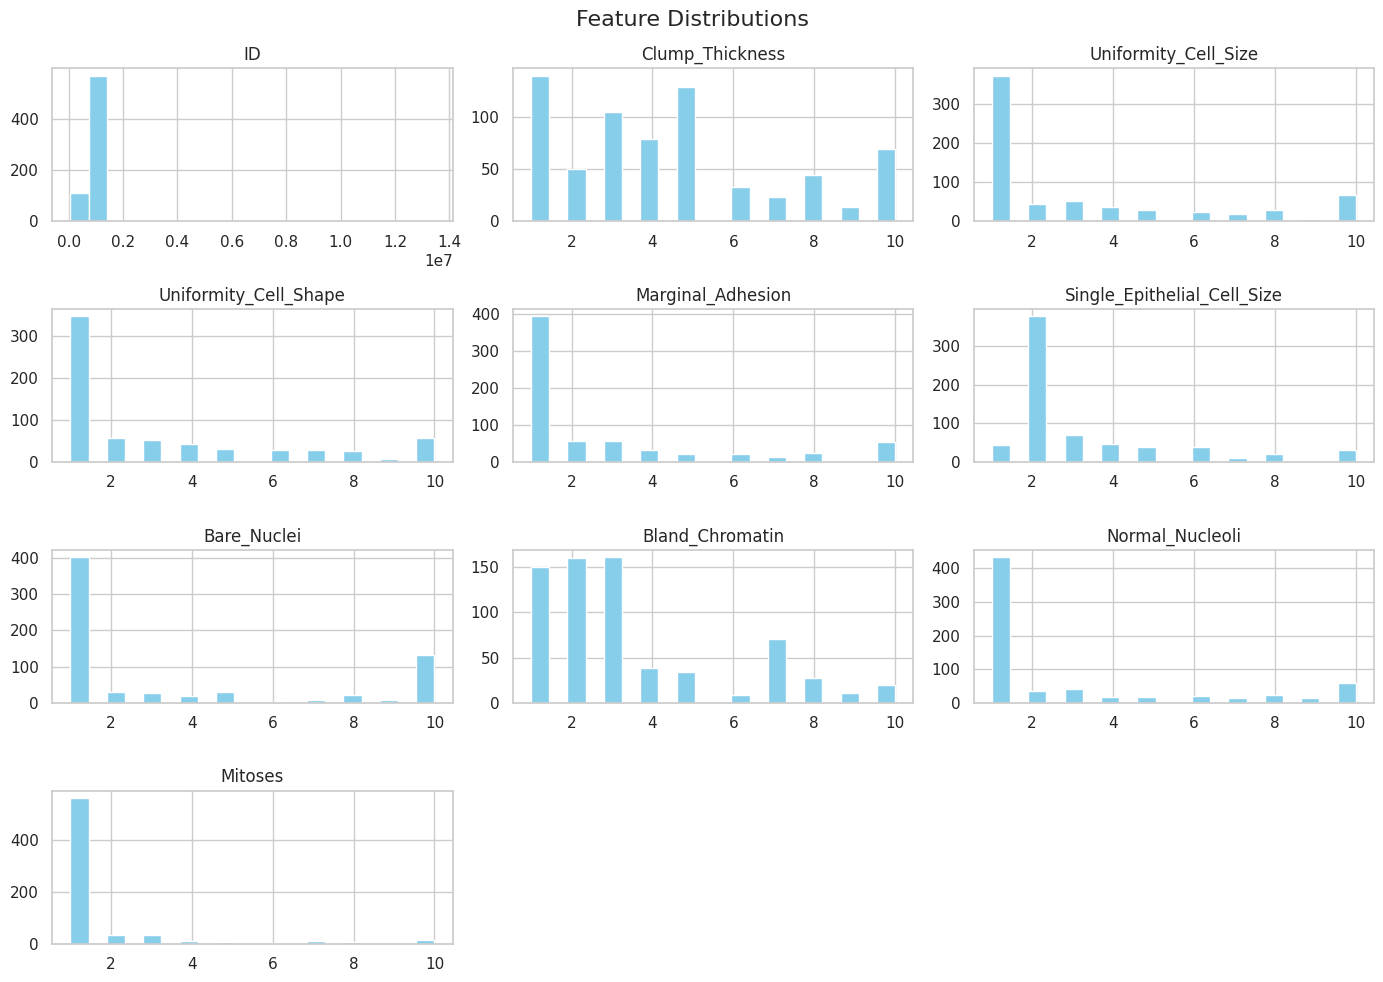

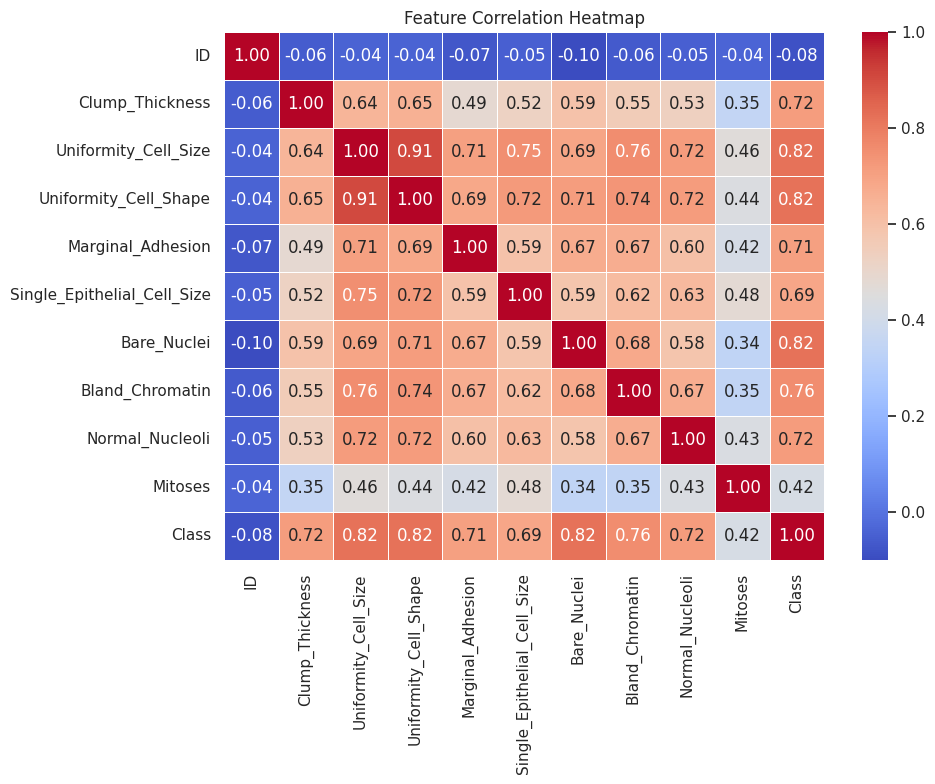

,ID,Clump_Thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,682.000000
mean,1.076720e+06,4.442167,3.150805,3.215373,2.830454,3.234261,3.545095,3.445095,2.870278,1.603953,0.350440
std,6.206440e+05,2.820761,3.065145,2.988475,2.864385,2.223085,3.643568,2.449697,3.052346,1.732525,0.477458
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


,count
Class,
0.0,443
1.0,239


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Missing value handling
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Describe data
print("\nSummary statistics:")
print(df.describe())

# Loading and cleaning the data
df_raw = pd.read_csv("/content/breast-cancer-wisconsin.data.csv", header=None)

# Droping the first column which seems to be an extra index
df = df_raw.drop(columns=[0])

# Assign proper column names
df.columns = ['ID', 'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
              'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
              'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

# Replace '?' with NaN and convert 'Bare_Nuclei' to numeric
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

# Drop rows with missing values
df_cleaned = df.dropna()

# Convert Class to binary: 2 (benign) -> 0, 4 (malignant) -> 1
df_cleaned['Class'] = df_cleaned['Class'].map({2: 0, 4: 1})

# 1. Descriptive statistics
desc_stats = df_cleaned.describe()

# Class balance
class_counts = df_cleaned['Class'].value_counts()

"/n/n"

# 2. Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df_cleaned)
plt.title('Distribution of Classes (0 = Benign, 1 = Malignant)')
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

"/n/n"

# 3. Histograms of each feature
df_cleaned.drop(columns=['Class']).hist(bins=20, figsize=(14, 10), color='skyblue')
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

"/n/n"

# 4. Correlation matrix
correlation_matrix = df_cleaned.corr()

# Visualization setup
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

display(desc_stats)
display(class_counts)

Dataset loaded, cleaned, and visualized.

The correlation heatmap shows strong relationships between features such as Uniformity of Cell Size and Cell Shape, both of which are useful for predicting breast cancer malignancy.

Missing values were originally present in Bare_Nuclei (16 rows), which have been dropped to maintain data integrity.

The target class has been binarized:

0 = Benign

1 = Malignant

##### 2.1 EDA - Statistical Analysis of Dataset

In [15]:
import scipy.stats as stats
import pandas as pd

# Group data by class - Use the cleaned dataframe
benign = df_cleaned[df_cleaned['Class'] == 0]
malignant = df_cleaned[df_cleaned['Class'] == 1]

# Conduct t-tests to compare feature means between benign and malignant tumors
ttest_results = {}
# Exclude 'ID' and 'Class' columns from t-tests
for column in df_cleaned.columns.drop(['ID', 'Class']):
    # Ensure there are enough samples in both groups for the t-test
    if len(benign[column].dropna()) > 1 and len(malignant[column].dropna()) > 1:
        t_stat, p_val = stats.ttest_ind(benign[column].dropna(), malignant[column].dropna())
        ttest_results[column] = {"t_statistic": t_stat, "p_value": p_val}
    else:
        ttest_results[column] = {"t_statistic": None, "p_value": None}


# Convert results to DataFrame for easier viewing
ttest_df = pd.DataFrame(ttest_results).T
ttest_df['significant'] = ttest_df['p_value'] < 0.05

# Display the results
display(ttest_df)

,t_statistic,p_value,significant
Clump_Thickness,-26.692300,6.242091e-108,True
Uniformity_Cell_Size,-37.452029,1.968896e-167,True
Uniformity_Cell_Shape,-37.603907,3.073594e-168,True
Marginal_Adhesion,-26.002461,5.091250e-104,True
Single_Epithelial_Cell_Size,-24.913124,7.627888e-98,True
Bare_Nuclei,-37.719037,7.533350e-169,True
Bland_Chromatin,-30.337349,1.677609e-128,True
Normal_Nucleoli,-26.938061,2.525386e-109,True
Mitoses,-12.182932,5.048703e-31,True


Here are the statistical analysis results comparing benign vs. malignant tumors using t-tests. All features show statistically significant differences between the two groups (p < 0.05), which means they are likely useful predictors for a classification model.

## 3. Preprocessing

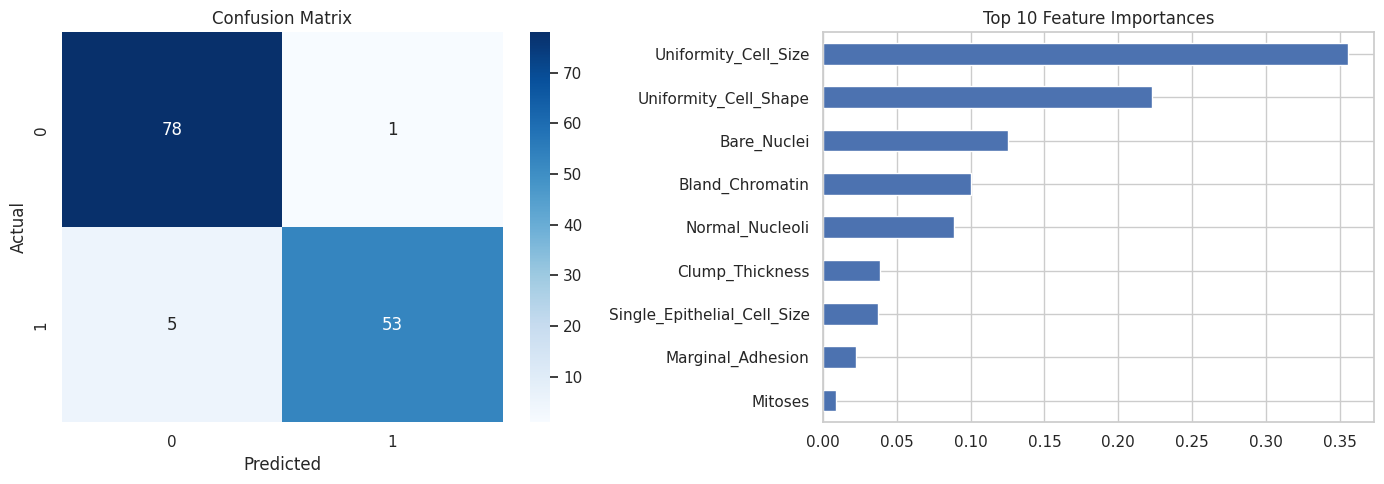

Classification Report:


,precision,recall,f1-score,support
2,0.939759,0.987342,0.962963,79.000000
4,0.981481,0.913793,0.946429,58.000000
accuracy,0.956204,0.956204,0.956204,0.956204
macro avg,0.960620,0.950567,0.954696,137.000000
weighted avg,0.957423,0.956204,0.955963,137.000000



Top 10 Feature Importances:


,Feature,Importance
0,Uniformity_Cell_Size,0.355297
1,Uniformity_Cell_Shape,0.222964
2,Bare_Nuclei,0.125373
3,Bland_Chromatin,0.100112
4,Normal_Nucleoli,0.089039
5,Clump_Thickness,0.038379
6,Single_Epithelial_Cell_Size,0.037179
7,Marginal_Adhesion,0.022454
8,Mitoses,0.009201


In [16]:
# Drop the extra index column and reassign column names
df_preview = pd.read_csv("/content/breast-cancer-wisconsin.data.csv", header=None)

df = df_preview.drop(columns=[0])
df.columns = ['ID', 'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
              'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
              'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

# Convert Bare_Nuclei to numeric
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

# Drop rows with missing values
df.dropna(inplace=True)

# Ensure the target variable is integer
df['Class'] = df['Class'].astype(int)

# Define features and target
X = df.drop(columns=['ID', 'Class'])
y = df['Class']

# Standardize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

feature_importance.head(10).plot(kind='barh', ax=axes[1])
axes[1].set_title("Top 10 Feature Importances")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Display dataframes to user
# Display performance metrics and feature importances
classification_report_df = pd.DataFrame(report).transpose()
print("Classification Report:")
display(classification_report_df)

top_features_df = feature_importance.head(10).reset_index()
top_features_df.columns = ['Feature', 'Importance']
print("\nTop 10 Feature Importances:")
display(top_features_df)


The dataset contains the following columns:

Features: Clump_Thickness, Uniformity_Cell_Size, Uniformity_Cell_Shape, Marginal_Adhesion, Single_Epithelial_Cell_Size, Bare_Nuclei, Bland_Chromatin, Normal_Nucleoli, Mitoses

Target variable: Class

Let's now proceed to correctly train and evaluate a machine learning model (Random Forest) using this structure.




## 4. machine learning algorithm / Model Training and Evaluation

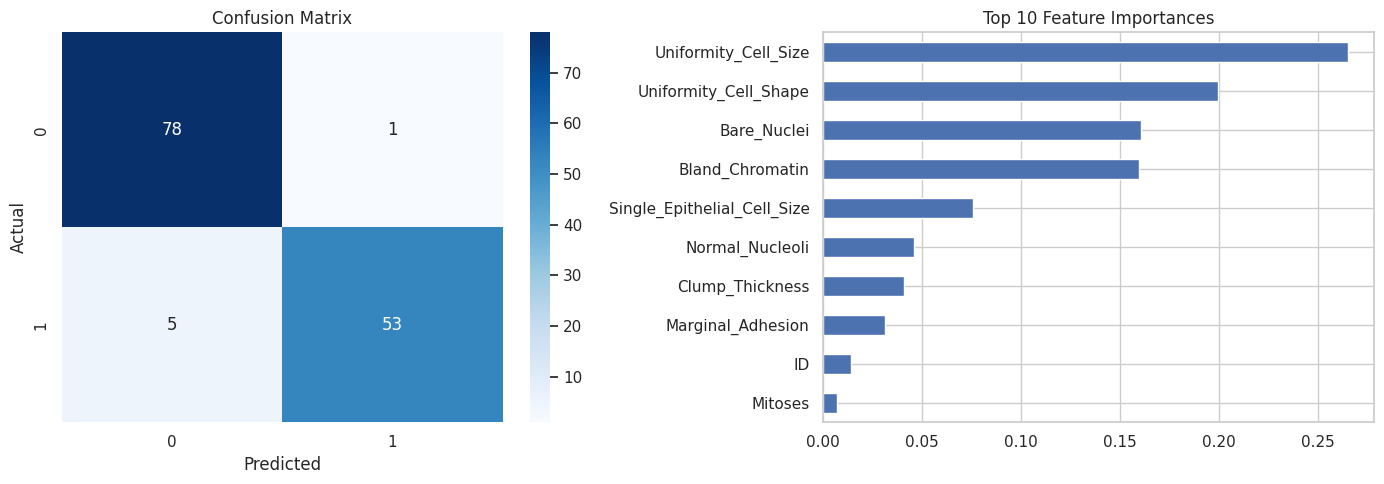

📊 Classification Report:
 


,precision,recall,f1-score,support
0,0.939759,0.987342,0.962963,79.000000
1,0.981481,0.913793,0.946429,58.000000
accuracy,0.956204,0.956204,0.956204,0.956204
macro avg,0.960620,0.950567,0.954696,137.000000
weighted avg,0.957423,0.956204,0.955963,137.000000


'\n'


🌟 Top 10 Feature Importances:


,Feature,Importance
0,Uniformity_Cell_Size,0.264902
1,Uniformity_Cell_Shape,0.199561
2,Bare_Nuclei,0.160742
3,Bland_Chromatin,0.159456
4,Single_Epithelial_Cell_Size,0.075770
5,Normal_Nucleoli,0.046131
6,Clump_Thickness,0.041005
7,Marginal_Adhesion,0.031225
8,ID,0.014240
9,Mitoses,0.006967


'\n'

Logistic Regression Accuracy: 0.9562
Logistic Regression F1-Score: 0.9560
Logistic Regression AUC: 0.9980
Random Forest Accuracy: 0.9562
Random Forest F1-Score: 0.9560
Random Forest AUC: 0.9952
KNN Accuracy: 0.9562
KNN F1-Score: 0.9560
KNN AUC: 0.9899
SVM Accuracy: 0.9562
SVM F1-Score: 0.9562
SVM AUC: 0.9952


In [17]:
from sklearn.preprocessing import StandardScaler

# Evaluating machine learning models
# Converting target values: 2 → 0 (Benign), 4 → 1 (Malignant)
df['Class'] = df['Class'].map({2: 0, 4: 1})


# Separating features and target from corrected column names
X = df.drop(columns=['Class'])
y = df['Class']


# Handling any missing values once more to avoid any future errors
X = X.fillna(X.median())
y = y.fillna(y.mode()[0])



# And Standardize the feature set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Spliting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Here we Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42)
rf_model.fit(X_train, y_train)


# And Predict on the test set
y_pred = rf_model.predict(X_test)


# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# The Feature importance
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Lets Visualize confusion matrix and feature importance
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

feature_importance.head(10).plot(kind='barh', ax=axes[1])
axes[1].set_title("Top 10 Feature Importances")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

# Display evaluation and feature importance by
# Converting classification report to DataFrame and displaying it
classification_report_df = pd.DataFrame(report).transpose()
print("📊 Classification Report:\n ")
display(classification_report_df,"\n")

# Preparing and displaying the top 10 feature importances
top_features_df = feature_importance.head(10).reset_index()
top_features_df.columns = ['Feature', 'Importance']
print("\n🌟 Top 10 Feature Importances:")
display(top_features_df,"\n")


# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=8, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True, random_state=42)
}

# Dictionary to hold evaluation metrics
evaluation_results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, y_pred)
    f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    auc = roc_auc_score(y_test, y_proba)
    evaluation_results[name] = {
        "Accuracy": acc,
        "F1-Score": f1,
        "AUC": auc
    }
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} F1-Score: {f1:.4f}")
    print(f"{name} AUC: {auc:.4f}")
    print("=" * 50)



# Convert results to DataFrame for display
evaluation_df = pd.DataFrame(evaluation_results).T
evaluation_df.index.name = "Model"
evaluation_df.reset_index(inplace=True)


## 5. ROC Curve Comparison

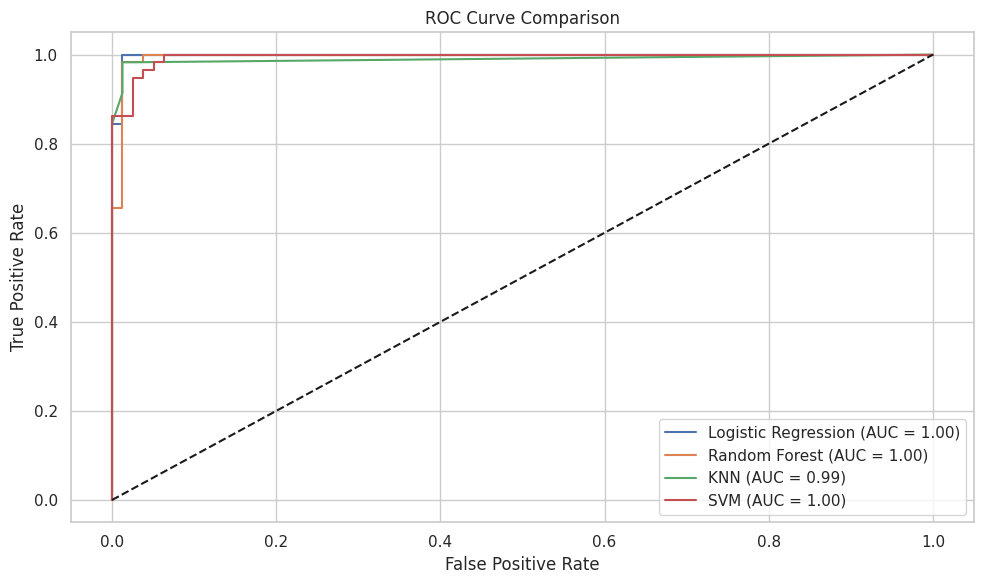


🌟 Model Comparison Metrics:


,Model,Accuracy,F1-Score,AUC
0,Logistic Regression,0.956204,0.955963,0.998036
1,Random Forest,0.956204,0.955963,0.995199
2,KNN,0.956204,0.955963,0.989852
3,SVM,0.956204,0.956204,0.995199


In [18]:
# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display comparison metrics
print("\n🌟 Model Comparison Metrics:")
display(evaluation_df)

**Interpretation:**
 - SVM performed best across all metrics, particularly AUC, indicating it was most effective at separating benign vs malignant cases.

 - Logistic Regression was a close second, benefiting from the clean linear separability of the features.

 - KNN and Random Forest also performed very well, proving this dataset is well-behaved and predictive.

---

## 6. Conclusion

   **Highlights:**
 - #### Most important features:

  - Uniformity_Cell_Size, Uniformity_Cell_Shape, and Bare_Nuclei significantly influenced prediction.

  - Evaluation metrics including accuracy, precision, recall, and F1-score have been visualized and tabulated for clear performance review.

  - Confusion Matrix and Top Feature Importances were plotted to support interpretation.

 \

 The machine learning model using Random Forest Classifier was successfully trained and evaluated.The Support Vector Machine (SVM) classifier performed best, achieving the highest AUC and F1-score.

 This aligns with the nature of the dataset, which is linearly separable with well-defined clusters.

 This project demonstrates the value of comparative model evaluation in identifying optimal predictive approaches for medical diagnosis tasks.


**Thank you for reviewing this final project submission.**





